In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
from scipy.signal import periodogram

In [94]:
# read temperatures
ds = xr.open_dataset('MyChallengePaleo/T2m_R2_ym_1stMill.nc')
df = ds.to_dataframe()['T2m']

# read solar activity
ds = xr.open_dataset('MyChallengePaleo/Solar_forcing_1st_mill.nc')
sol = ds['TSI'][:, 0, 0].to_dataframe()

# read volcanic activity
ds = xr.open_dataset('MyChallengePaleo/Volc_Forc_AOD_1st_mill.nc')
vol = ds['AOD'][:, 0, 0].to_dataframe()

# periodograms

In [5]:
globAvg = df.groupby('time').mean()

In [6]:
globAvg

time
10716.0      277.738007
20716.0      277.710815
30716.0      277.615387
40716.0      277.537537
50716.0      277.598175
                ...    
9950716.0    277.483154
9960716.0    277.520325
9970716.0    277.635803
9980716.0    277.537231
9990716.0    277.338776
Name: T2m, Length: 999, dtype: float32

flatten dataframe

In [37]:
flat = df.reset_index(level=['lat', 'lon', 'time'])
tropical = flat[np.abs(flat.lat) < 30]
polar = flat[np.abs(flat.lat) > 60]

lon = flat.lon
lat = flat.lat

## plot a Lomb-Scargle periodogram

probably overkill for evenly-sampled data, but I am familiar with it

In [19]:
f_min = 1e-7
f_max = 1e-4
t = globAvg.index

ls = LombScargle(t, globAvg)
frequency, power = ls.autopower(minimum_frequency=f_min,
                                             maximum_frequency=f_max)

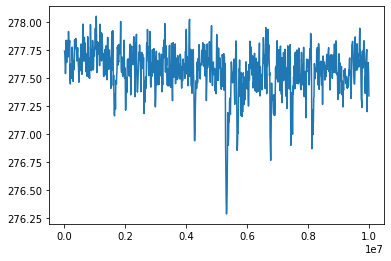

In [20]:
plt.plot(globAvg.index, globAvg)

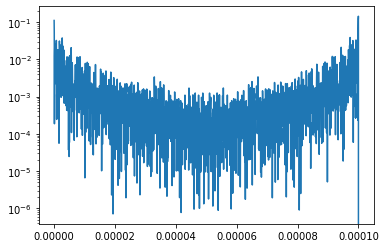

In [21]:
plt.semilogy(frequency, power)

this is probably just the window function and some aliases of it...

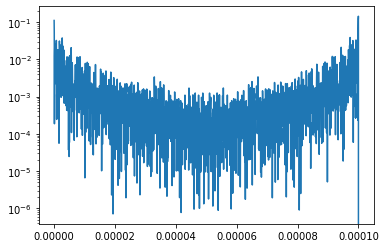

In [26]:
ls_trop = LombScargle(tropical.time, tropical.T2m)
frequency, power = ls.autopower(minimum_frequency=f_min,
                                             maximum_frequency=f_max)
plt.semilogy(frequency, power)

## classical FFT periodograms

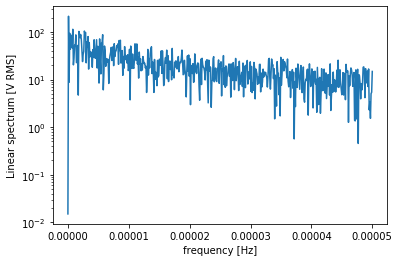

In [10]:
fs = len(t)/(t[-1]-t[0]) # sampling frequency
f, Pxx_spec = periodogram(globAvg, fs)
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
# plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

# Regression/Classification
Can we predict the vulcanic activity/Solar activity from the temperature maps?

In [78]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from netCDF4 import Dataset
from sklearn.model_selection import train_test_split

In [122]:
# reg = RidgeCV()
reg = RandomForestRegressor()

# Y = sol.TSI
Y = vol.AOD
X = np.array(tropical.groupby('time').mean().T2m).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)#, random_state=42)

# Y =  Dataset('MyChallengePaleo/Solar_forcing_1st_mill.nc', 'r')['TSI'][:, 0, 0]
# # unpacking variables
# R1 =  Dataset('MyChallengePaleo/T2m_R1_ym_1stMill.nc', 'r')
# X = R1.variables['T2m'][:].reshape(-1, lon.shape[0] * lat.shape[0])
# R2 =  Dataset('MyChallengePaleo/T2m_R2_ym_1stMill.nc', 'r')
# Xtest = R2.variables['T2m'][:].reshape(-1, lon.shape[0] * lat.shape[0])

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.4798290958579998

total 272
-rwxr-xr-x  1 schlecker  MPIA\Domain Users     189 Apr  2 14:42 AUTHORS.md*
-rwxr-xr-x  1 schlecker  MPIA\Domain Users    1078 Apr  2 14:42 LICENSE*
drwx------@ 6 schlecker  MPIA\Domain Users     192 Apr  2 14:48 MyChallengePaleo/
-rw-r--r--  1 schlecker  MPIA\Domain Users      87 Apr  2 14:42 README.md
drwxr-xr-x  4 schlecker  MPIA\Domain Users     128 Apr  2 14:42 examples/
drwxr-xr-x  5 schlecker  MPIA\Domain Users     160 Apr  2 14:42 frequencyanalysis/
-rw-r--r--  1 schlecker  MPIA\Domain Users       0 Apr  2 14:42 frequencyanalysis_timo.py
-rw-r--r--  1 schlecker  MPIA\Domain Users    6866 Apr  2 14:42 netCDF_simon.ipynb
drwxr-xr-x  4 schlecker  MPIA\Domain Users     128 Apr  2 14:42 netcdf_helpers/
-rw-r--r--  1 schlecker  MPIA\Domain Users  109298 Apr  2 17:49 periodograms.ipynb
drwxr-xr-x  4 schlecker  MPIA\Domain Users     128 Apr  2 14:42 plot/
-rw-r--r--  1 schlecker  MPIA\Domain Users     890 Apr  2 14:42 timo.py
-rw-r--r--  1 schlecker  MPIA\Domain Users      11